In [1]:
import pandas as pd
# import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [2]:
mergeddf = pd.read_csv('../data/joint_public_data_2022.csv')

/var/folders/3f/0w5y80cn6wj986lwfb84fv540000gn/T/ipykernel_13166/523460548.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  mergeddf = pd.read_csv('../data/joint_public_data_2022.csv')


In [3]:
mergeddf

,SRCategory,SRType,SRPriority,SRSource,SRStatus,SRResolution,BoroughCode,CommunityBoard,ServiceRequestParentGlobalID,GlobalID,...,RADefect,RADefectLocation,Failure,ImpactTarget,Consequence,RiskRating,RAGlobalID,RACreatedDate,FailureImpact,WorkOrderGlobalID
0,Plant Tree,Street Tree,Routine,3-1-1 Call Center,Open,Reviewed - Inspection Assigned,Queens,411.0,NaN,3EC81228-3DE6-4314-8339-F89A0720A9A8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Prune,Clear Building,Routine,3-1-1 Call Center,Closed,Inspected - No Work Order,Bronx,209.0,NaN,4B8D16C7-CA9C-49A8-9219-172667426BEA,...,No Visible Defect,Entire Tree,1.0,1.0,1.0,3.0,E769B9B9-092D-4A26-A422-CE1FEF0B0407,2022-09-09 13:36:22.0000000,2.0,NaN
2,Plant Tree,Street Tree,Routine,3-1-1 Call Center,Open,Reviewed - Inspection Assigned,Staten Island,502.0,NaN,77D798B5-4687-4430-A2AE-AE693E674AB0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hazard,Hanging Limb Other,Routine,3-1-1 Call Center,Open,Work Priority Category - C,Queens,407.0,799570A8-71A4-4361-A6A8-464FA8AD9448,591583A7-B107-49EC-BFA7-415BE6D3EA4B,...,Decay,Root Flare,1.0,4.0,3.0,8.0,BE5660B0-3EA8-4654-B7A9-958ED52C719C,2022-06-13 19:12:00.0000000,5.0,53D63DEA-0EFE-4DB7-89CB-EE8C5CBDD728
4,Hazard,Hanging Limb Other,Routine,3-1-1 Call Center,Open,Work Priority Category - C,Queens,407.0,799570A8-71A4-4361-A6A8-464FA8AD9448,591583A7-B107-49EC-BFA7-415BE6D3EA4B,...,Dead Wood,Branches,2.0,4.0,2.0,8.0,0B638670-144C-4233-BE44-7D903E31AC75,2022-06-13 19:12:00.0000000,6.0,53D63DEA-0EFE-4DB7-89CB-EE8C5CBDD728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107076,Prune,Prune Other,Routine,AMPS,Open,Work Priority Category - D,Manhattan,107.0,0EC14482-2A36-4984-8483-8F6548DFE49B,4B5A41D5-8A0B-4754-B979-3429D85C1925,...,No Visible Defect,Entire Tree,1.0,3.0,1.0,5.0,F6C63278-29D8-419F-BA4F-8AB2574DCC4C,2022-04-22 11:57:42.0000000,4.0,NaN
107077,Prune,Prune Other,Routine,AMPS,Open,Work Priority Category - D,Manhattan,107.0,0EC14482-2A36-4984-8483-8F6548DFE49B,4B5A41D5-8A0B-4754-B979-3429D85C1925,...,Dead Wood,Branches,2.0,3.0,2.0,7.0,F8664EDB-C8A3-4E60-885E-318EB5175953,2022-04-22 11:58:49.0000000,5.0,NaN
107078,Hazard,Tree Down - Sidewalk,Routine,AMPS,Open,Work Priority Category - B,Queens,402.0,NaN,A3D2CE5B-32D9-464E-982B-78569B205789,...,Dead Wood,Branches,2.0,3.0,4.0,9.0,A440B09F-17FB-4E34-B0BE-EA8FE03A367F,2022-05-04 14:58:59.0000000,5.0,3B080277-4D00-4083-99D9-E55C3BDD70B8
107079,Hazard,Tree Down - Sidewalk,Routine,AMPS,Open,Work Priority Category - B,Queens,402.0,NaN,A3D2CE5B-32D9-464E-982B-78569B205789,...,Decay,Stem,2.0,3.0,4.0,9.0,CF9D67C4-285B-48BB-8385-D658AD909486,2022-05-04 15:16:14.0000000,5.0,71E74D8E-F6EB-4EE5-8195-32EBF58BC56A


In [4]:
mergeddf['SRCreatedDate_datetime'] = pd.to_datetime(mergeddf['SRCreatedDate'],errors='coerce')
#for each month
count_by_month = mergeddf['SRCreatedDate_datetime'].apply(lambda row: row.month)
count_by_month = count_by_month.to_frame()
count_by_month.rename(columns={'SRCreatedDate_datetime' : 'SRCreated_month'}, inplace = "True")
count_by_month.groupby(["SRCreated_month"]).size()
mergeddf = mergeddf.join(count_by_month)

## SRs by Risks

In [5]:
# get count by source and month 
df = mergeddf.groupby(['SRCreated_month', 'SRSource']).size().unstack(level=1)
df['month'] = ['Jan' ,' Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# sum other categories
df['Others'] = df[['DOT','DPR','DPR -Public Tree Map','Department of Parks and Recreation - Public Web Site','FDNY']].sum(axis=1)

<AxesSubplot: xlabel='month'>

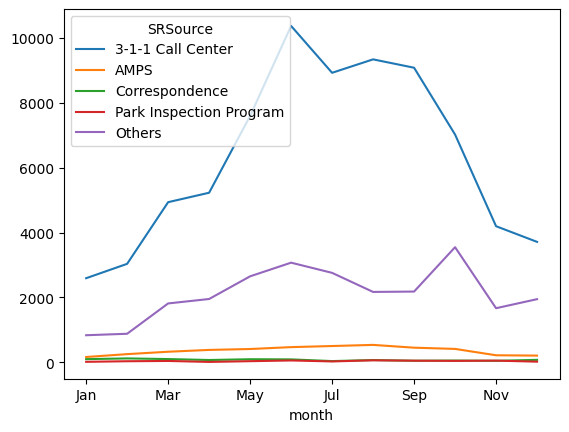

In [6]:
df.plot(x="month", y=['3-1-1 Call Center', 'AMPS', 'Correspondence','Park Inspection Program', 'Others'])

In [7]:
mergeddf

,SRCategory,SRType,SRPriority,SRSource,SRStatus,SRResolution,BoroughCode,CommunityBoard,ServiceRequestParentGlobalID,GlobalID,...,Failure,ImpactTarget,Consequence,RiskRating,RAGlobalID,RACreatedDate,FailureImpact,WorkOrderGlobalID,SRCreatedDate_datetime,SRCreated_month
0,Plant Tree,Street Tree,Routine,3-1-1 Call Center,Open,Reviewed - Inspection Assigned,Queens,411.0,NaN,3EC81228-3DE6-4314-8339-F89A0720A9A8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-07-07 15:28:00,7
1,Prune,Clear Building,Routine,3-1-1 Call Center,Closed,Inspected - No Work Order,Bronx,209.0,NaN,4B8D16C7-CA9C-49A8-9219-172667426BEA,...,1.0,1.0,1.0,3.0,E769B9B9-092D-4A26-A422-CE1FEF0B0407,2022-09-09 13:36:22.0000000,2.0,NaN,2022-07-07 15:30:53,7
2,Plant Tree,Street Tree,Routine,3-1-1 Call Center,Open,Reviewed - Inspection Assigned,Staten Island,502.0,NaN,77D798B5-4687-4430-A2AE-AE693E674AB0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-07-07 15:28:00,7
3,Hazard,Hanging Limb Other,Routine,3-1-1 Call Center,Open,Work Priority Category - C,Queens,407.0,799570A8-71A4-4361-A6A8-464FA8AD9448,591583A7-B107-49EC-BFA7-415BE6D3EA4B,...,1.0,4.0,3.0,8.0,BE5660B0-3EA8-4654-B7A9-958ED52C719C,2022-06-13 19:12:00.0000000,5.0,53D63DEA-0EFE-4DB7-89CB-EE8C5CBDD728,2022-07-07 15:30:49,7
4,Hazard,Hanging Limb Other,Routine,3-1-1 Call Center,Open,Work Priority Category - C,Queens,407.0,799570A8-71A4-4361-A6A8-464FA8AD9448,591583A7-B107-49EC-BFA7-415BE6D3EA4B,...,2.0,4.0,2.0,8.0,0B638670-144C-4233-BE44-7D903E31AC75,2022-06-13 19:12:00.0000000,6.0,53D63DEA-0EFE-4DB7-89CB-EE8C5CBDD728,2022-07-07 15:30:49,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107076,Prune,Prune Other,Routine,AMPS,Open,Work Priority Category - D,Manhattan,107.0,0EC14482-2A36-4984-8483-8F6548DFE49B,4B5A41D5-8A0B-4754-B979-3429D85C1925,...,1.0,3.0,1.0,5.0,F6C63278-29D8-419F-BA4F-8AB2574DCC4C,2022-04-22 11:57:42.0000000,4.0,NaN,2022-05-01 21:09:00,5
107077,Prune,Prune Other,Routine,AMPS,Open,Work Priority Category - D,Manhattan,107.0,0EC14482-2A36-4984-8483-8F6548DFE49B,4B5A41D5-8A0B-4754-B979-3429D85C1925,...,2.0,3.0,2.0,7.0,F8664EDB-C8A3-4E60-885E-318EB5175953,2022-04-22 11:58:49.0000000,5.0,NaN,2022-05-01 21:09:00,5
107078,Hazard,Tree Down - Sidewalk,Routine,AMPS,Open,Work Priority Category - B,Queens,402.0,NaN,A3D2CE5B-32D9-464E-982B-78569B205789,...,2.0,3.0,4.0,9.0,A440B09F-17FB-4E34-B0BE-EA8FE03A367F,2022-05-04 14:58:59.0000000,5.0,3B080277-4D00-4083-99D9-E55C3BDD70B8,2022-05-01 20:56:00,5
107079,Hazard,Tree Down - Sidewalk,Routine,AMPS,Open,Work Priority Category - B,Queens,402.0,NaN,A3D2CE5B-32D9-464E-982B-78569B205789,...,2.0,3.0,4.0,9.0,CF9D67C4-285B-48BB-8385-D658AD909486,2022-05-04 15:16:14.0000000,5.0,71E74D8E-F6EB-4EE5-8195-32EBF58BC56A,2022-05-01 20:56:00,5


In [8]:
import calendar

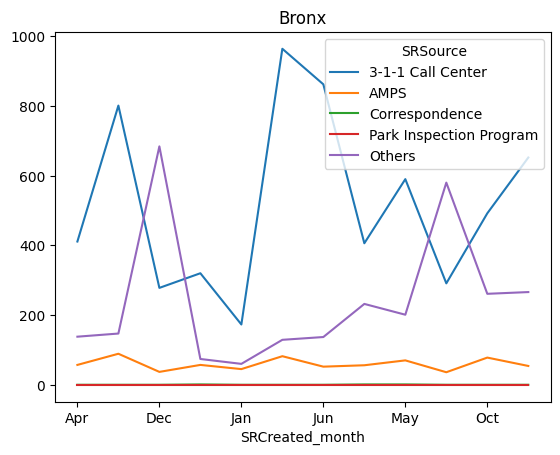

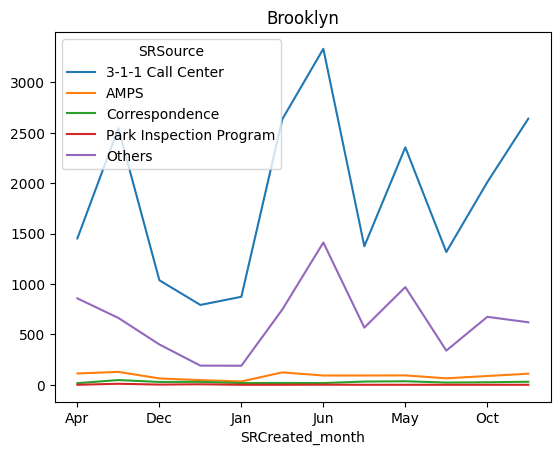

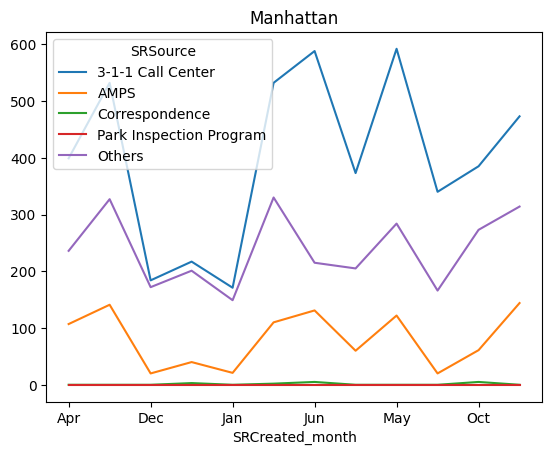

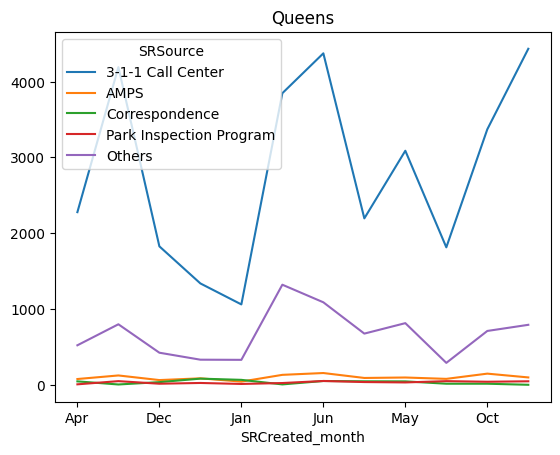

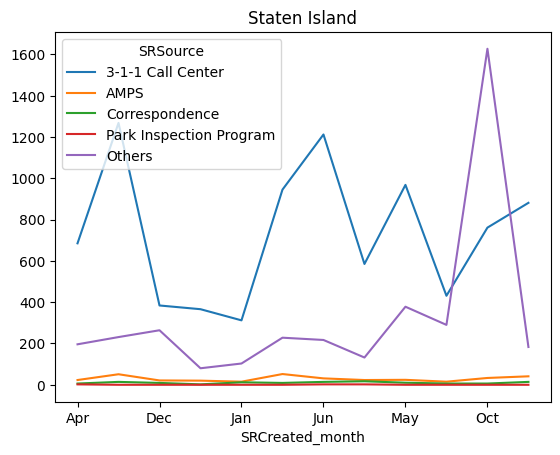

In [9]:
df_borough = mergeddf.copy()

df_borough.SRCreated_month = df_borough.SRCreated_month.apply(lambda x: calendar.month_abbr[x])
df_borough = df_borough.groupby(['BoroughCode', 'SRCreated_month', 'SRSource']).size().unstack(level=2)

df_borough['Others'] = df_borough[['DOT','DPR','DPR -Public Tree Map','Department of Parks and Recreation - Public Web Site','FDNY']].sum(axis=1)
df_borough.fillna(0, inplace=True)
df_borough.drop(['DOT','DPR','DPR -Public Tree Map','Department of Parks and Recreation - Public Web Site','FDNY'], axis=1, inplace=True)

# plot for each borough and month
for borough in df_borough.index.levels[0]:
    # print( df_borough.loc[(borough)])
    df_borough.loc[(borough)].plot()
    plt.title(borough)
    plt.show()

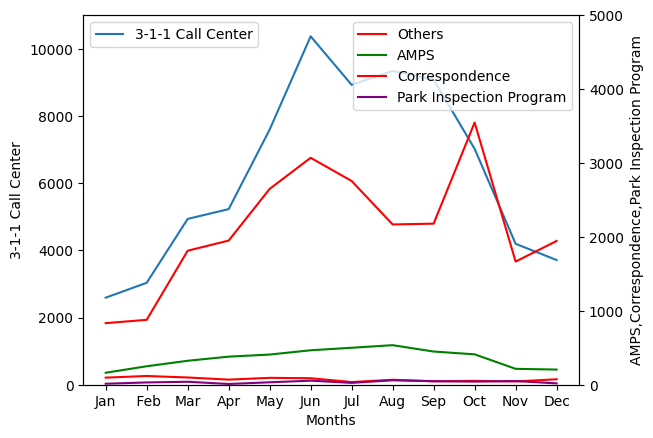

In [10]:
x = df['month']
y1 = df['3-1-1 Call Center']
y3 = df['AMPS']
y4 = df['Correspondence']
y5 = df['Park Inspection Program']
y2 = df['Others']

# create a figure and axis object
fig, ax1 = plt.subplots()

# plot the first line on the first y-axis
ax1.plot(x, y1, label='3-1-1 Call Center')
# ax1.plot(x, y2, label='Others')
# ax1.plot(x, y3, label='AMPS')
ax1.set_ylabel('3-1-1 Call Center')
ax1.set_xlabel('Months')

# create a second y-axis and plot the second line on it
ax2 = ax1.twinx()
ax2.plot(x, y2, color='red', label='Others')
ax2.plot(x, y3, color='green', label='AMPS')
ax2.plot(x, y4, color='red', label='Correspondence')
ax2.plot(x, y5, color='purple', label='Park Inspection Program')
ax2.set_ylabel('AMPS,Correspondence,Park Inspection Program')

# set the y-axis limits for the second y-axis to stretch the squeezed line
ax1.set_ylim(0, 11000)
ax2.set_ylim(0, 5000)

# add a legend for both lines
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1, labels1, loc =2)
ax2.legend(lines2, labels2, loc =1)

# show the plot
plt.show()

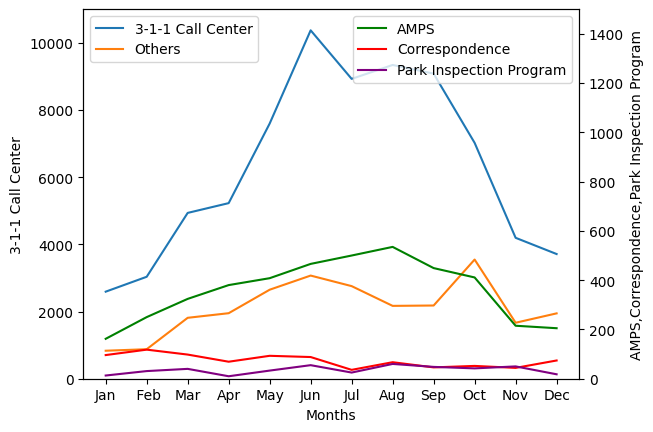

In [11]:
x = df['month']
y1 = df['3-1-1 Call Center']
y3 = df['AMPS']
y4 = df['Correspondence']
y5 = df['Park Inspection Program']
y2 = df['Others']

# create a figure and axis object
fig, ax1 = plt.subplots()

# plot the first line on the first y-axis
ax1.plot(x, y1, label='3-1-1 Call Center')
ax1.plot(x, y2, label='Others')
# ax1.plot(x, y3, label='AMPS')
ax1.set_ylabel('3-1-1 Call Center')
ax1.set_xlabel('Months')

# create a second y-axis and plot the second line on it
ax2 = ax1.twinx()
# ax2.plot(x, y2, color='red', label='Others')
ax2.plot(x, y3, color='green', label='AMPS')
ax2.plot(x, y4, color='red', label='Correspondence')
ax2.plot(x, y5, color='purple', label='Park Inspection Program')
ax2.set_ylabel('AMPS,Correspondence,Park Inspection Program')

# set the y-axis limits for the second y-axis to stretch the squeezed line
ax1.set_ylim(0, 11000)
ax2.set_ylim(0, 1500)

# add a legend for both lines
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1, labels1, loc =2)
ax2.legend(lines2, labels2, loc =1)

# show the plot
plt.show()

In [12]:
df_ins_by_risk = mergeddf[['InspectionDate','RiskRating','SRCreated_month']]
df_ins_by_risk = df_ins_by_risk.groupby(['SRCreated_month', 'RiskRating']).size().unstack()
df_ins_by_risk['month'] = ['Jan' ,' Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [13]:
df_ins_by_risk.columns

Index([3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 'month'], dtype='object', name='RiskRating')

## Requests yielding by Work Orders

In [14]:
mergeddf['WOCreatedDate'] = pd.to_datetime(mergeddf['WOCreatedDate'],errors='coerce')
mergeddf['WOCreatedDate_month'] = mergeddf['WOCreatedDate'].apply(lambda row: row.month)
mergeddf['Year'] = mergeddf['SRCreatedDate_datetime'].dt.year
mergeddf.groupby(['Year']).size()   

Year
2022    107081
dtype: int64

In [15]:
mergeddf['InsCreatedDate'] = pd.to_datetime(mergeddf['InsCreatedDate'],errors='coerce')
mergeddf['InsCreatedDate_month'] = mergeddf['InsCreatedDate'].apply(lambda row: row.month)
INS_group_by_month = mergeddf.groupby('InsCreatedDate_month').size()

In [16]:
SR_group_by_month = mergeddf.groupby('SRCreated_month').size()
WO_group_by_month = mergeddf.groupby('WOCreatedDate_month').size()
df_SR_yield_WO = pd.DataFrame({'SRs': SR_group_by_month, 'WOs': WO_group_by_month, 'INSs': INS_group_by_month})
df_SR_yield_WO['month'] = ['Jan' ,' Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [28]:
df_SR_yield_WO[['SRs','month']].set_index('month').to_csv('SRs.csv')

In [30]:
df_SR_yield_WO.set_index('month').to_csv('SRs_WOs_INSs.csv')


,SRs,WOs,INSs
month,,,
Jan,3695,1500,2210
Feb,4311,1745,2555
Mar,7210,2467,4099
Apr,7635,2103,3538
May,10777,2438,3773
Jun,14048,3995,5877
Jul,12241,3898,5890
Aug,12168,4376,6555
Sep,11802,3927,5990


Text(0.5, 1.0, 'Requests yielding Inspections and Work Orders')

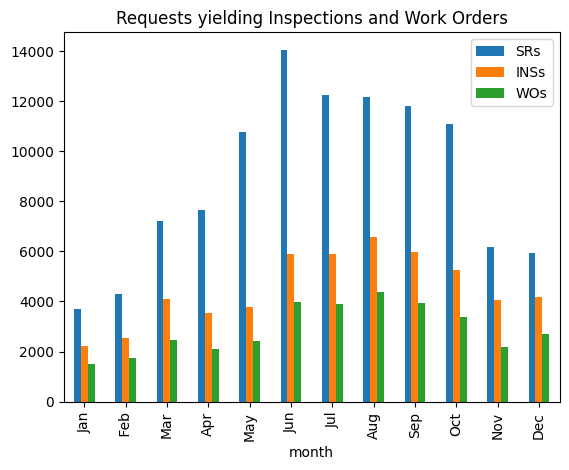

In [17]:
df_SR_yield_WO.plot(x="month", y=["SRs", 'INSs', "WOs"], kind="bar")
plt.title('Requests yielding Inspections and Work Orders')


## Inspection Results by Risk

In [52]:
# new comlumn coding the risk rating:  Risk ratings of 12 - 11 are priority A, 10 is priority B, 9 is priority C, and 8 - 3 are priority D
mergeddf['RiskRating'].fillna(0, inplace=True)
risk_encoding_map = {12: 'A', 11: 'A', 10: 'B', 9: 'C'}
for i in range(3, 9):
    risk_encoding_map[i] = 'D'
for i in range(0, 3):
    risk_encoding_map[i] = 'E'

# Define a function to apply the mapping to each row
def map_priority(row):
    # risk_rating = row['RiskRating']
    priority = np.where(row in risk_encoding_map, risk_encoding_map[row], 'Unknown')
    return priority

# Apply the function to each row of the DataFrame
mergeddf['Risk_coded'] = mergeddf['RiskRating'].apply(map_priority)

In [53]:
mergeddf

,SRCategory,SRType,SRPriority,SRSource,SRStatus,SRResolution,BoroughCode,CommunityBoard,ServiceRequestParentGlobalID,GlobalID,...,RAGlobalID,RACreatedDate,FailureImpact,WorkOrderGlobalID,SRCreatedDate_datetime,SRCreated_month,WOCreatedDate_month,Year,InsCreatedDate_month,Risk_coded
0,Plant Tree,Street Tree,Routine,3-1-1 Call Center,Open,Reviewed - Inspection Assigned,Queens,411.0,NaN,3EC81228-3DE6-4314-8339-F89A0720A9A8,...,NaN,NaN,NaN,NaN,2022-07-07 15:28:00,7,NaN,2022,NaN,E
1,Prune,Clear Building,Routine,3-1-1 Call Center,Closed,Inspected - No Work Order,Bronx,209.0,NaN,4B8D16C7-CA9C-49A8-9219-172667426BEA,...,E769B9B9-092D-4A26-A422-CE1FEF0B0407,2022-09-09 13:36:22.0000000,2.0,NaN,2022-07-07 15:30:53,7,NaN,2022,9.0,D
2,Plant Tree,Street Tree,Routine,3-1-1 Call Center,Open,Reviewed - Inspection Assigned,Staten Island,502.0,NaN,77D798B5-4687-4430-A2AE-AE693E674AB0,...,NaN,NaN,NaN,NaN,2022-07-07 15:28:00,7,NaN,2022,NaN,E
3,Hazard,Hanging Limb Other,Routine,3-1-1 Call Center,Open,Work Priority Category - C,Queens,407.0,799570A8-71A4-4361-A6A8-464FA8AD9448,591583A7-B107-49EC-BFA7-415BE6D3EA4B,...,BE5660B0-3EA8-4654-B7A9-958ED52C719C,2022-06-13 19:12:00.0000000,5.0,53D63DEA-0EFE-4DB7-89CB-EE8C5CBDD728,2022-07-07 15:30:49,7,6.0,2022,6.0,D
4,Hazard,Hanging Limb Other,Routine,3-1-1 Call Center,Open,Work Priority Category - C,Queens,407.0,799570A8-71A4-4361-A6A8-464FA8AD9448,591583A7-B107-49EC-BFA7-415BE6D3EA4B,...,0B638670-144C-4233-BE44-7D903E31AC75,2022-06-13 19:12:00.0000000,6.0,53D63DEA-0EFE-4DB7-89CB-EE8C5CBDD728,2022-07-07 15:30:49,7,6.0,2022,6.0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107076,Prune,Prune Other,Routine,AMPS,Open,Work Priority Category - D,Manhattan,107.0,0EC14482-2A36-4984-8483-8F6548DFE49B,4B5A41D5-8A0B-4754-B979-3429D85C1925,...,F6C63278-29D8-419F-BA4F-8AB2574DCC4C,2022-04-22 11:57:42.0000000,4.0,NaN,2022-05-01 21:09:00,5,4.0,2022,4.0,D
107077,Prune,Prune Other,Routine,AMPS,Open,Work Priority Category - D,Manhattan,107.0,0EC14482-2A36-4984-8483-8F6548DFE49B,4B5A41D5-8A0B-4754-B979-3429D85C1925,...,F8664EDB-C8A3-4E60-885E-318EB5175953,2022-04-22 11:58:49.0000000,5.0,NaN,2022-05-01 21:09:00,5,4.0,2022,4.0,D
107078,Hazard,Tree Down - Sidewalk,Routine,AMPS,Open,Work Priority Category - B,Queens,402.0,NaN,A3D2CE5B-32D9-464E-982B-78569B205789,...,A440B09F-17FB-4E34-B0BE-EA8FE03A367F,2022-05-04 14:58:59.0000000,5.0,3B080277-4D00-4083-99D9-E55C3BDD70B8,2022-05-01 20:56:00,5,5.0,2022,5.0,C
107079,Hazard,Tree Down - Sidewalk,Routine,AMPS,Open,Work Priority Category - B,Queens,402.0,NaN,A3D2CE5B-32D9-464E-982B-78569B205789,...,CF9D67C4-285B-48BB-8385-D658AD909486,2022-05-04 15:16:14.0000000,5.0,71E74D8E-F6EB-4EE5-8195-32EBF58BC56A,2022-05-01 20:56:00,5,5.0,2022,5.0,C


In [54]:
mergeddf['InsCreatedDate'] = pd.to_datetime(mergeddf['InsCreatedDate'],errors='coerce')
mergeddf['InsCreatedDate_month'] = mergeddf['InsCreatedDate'].apply(lambda row: row.month)
INS_group_by_month = mergeddf.groupby('InsCreatedDate_month').size()
INS_group_by_month

InsCreatedDate_month
1.0     2210
2.0     2555
3.0     4099
4.0     3538
5.0     3773
6.0     5877
7.0     5890
8.0     6555
9.0     5990
10.0    5254
11.0    4070
12.0    4196
dtype: int64

In [55]:
df_ins_by_risk

RiskRating,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,month
SRCreated_month,,,,,,,,,,,
1,67.0,85.0,133.0,282.0,367.0,372.0,313.0,36.0,3.0,NaN,Jan
2,100.0,87.0,124.0,321.0,528.0,570.0,379.0,75.0,2.0,8.0,Feb
3,185.0,196.0,180.0,473.0,830.0,786.0,535.0,125.0,24.0,5.0,Mar
4,185.0,140.0,224.0,558.0,773.0,762.0,433.0,72.0,11.0,1.0,Apr
5,266.0,236.0,338.0,799.0,1170.0,1048.0,728.0,132.0,23.0,NaN,May
6,309.0,259.0,426.0,1120.0,1608.0,1672.0,1001.0,194.0,23.0,2.0,Jun
7,293.0,190.0,333.0,948.0,1581.0,1570.0,828.0,174.0,20.0,14.0,Jul
8,295.0,192.0,390.0,1049.0,1689.0,1759.0,930.0,186.0,32.0,9.0,Aug
9,226.0,118.0,281.0,940.0,1639.0,1870.0,1082.0,174.0,32.0,5.0,Sep


In [56]:
df_ins_by_risk

RiskRating,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,month
SRCreated_month,,,,,,,,,,,
1,67.0,85.0,133.0,282.0,367.0,372.0,313.0,36.0,3.0,NaN,Jan
2,100.0,87.0,124.0,321.0,528.0,570.0,379.0,75.0,2.0,8.0,Feb
3,185.0,196.0,180.0,473.0,830.0,786.0,535.0,125.0,24.0,5.0,Mar
4,185.0,140.0,224.0,558.0,773.0,762.0,433.0,72.0,11.0,1.0,Apr
5,266.0,236.0,338.0,799.0,1170.0,1048.0,728.0,132.0,23.0,NaN,May
6,309.0,259.0,426.0,1120.0,1608.0,1672.0,1001.0,194.0,23.0,2.0,Jun
7,293.0,190.0,333.0,948.0,1581.0,1570.0,828.0,174.0,20.0,14.0,Jul
8,295.0,192.0,390.0,1049.0,1689.0,1759.0,930.0,186.0,32.0,9.0,Aug
9,226.0,118.0,281.0,940.0,1639.0,1870.0,1082.0,174.0,32.0,5.0,Sep


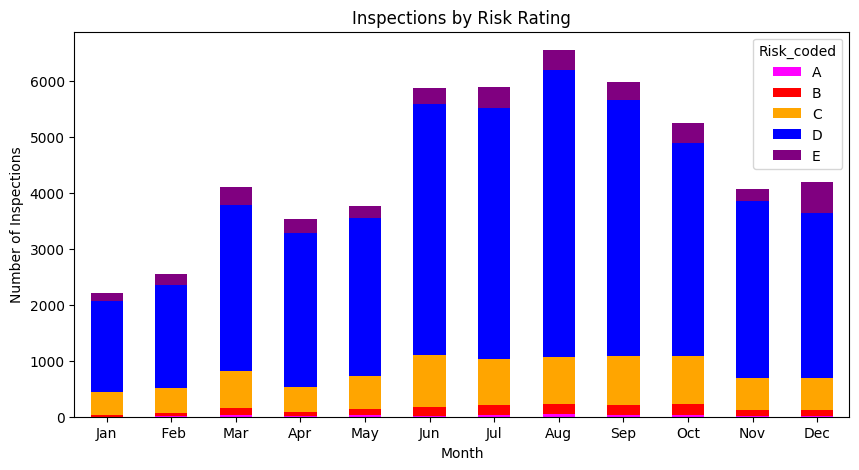

In [106]:
# plot the data hue by Risk_coded 
df_ins_by_risk = mergeddf[['InspectionDate','Risk_coded','InsCreatedDate_month']]
df_ins_by_risk = df_ins_by_risk.groupby(['InsCreatedDate_month', 'Risk_coded']).size().unstack()

df_ins_by_risk['month'] = ['Jan' ,' Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# df_ins_by_risk.plot(kind='bar', stacked=True)

colors = ['magenta', 'red', 'orange', 'blue', 'purple']

# plot stacked bar chart x-axis: month, y-axis: number of inspections, hue: risk rating
ax = df_ins_by_risk.plot.bar(x='month', y=['A','B','C','D','E'], rot=0, stacked=True, color=colors, figsize=(10,5))

# title
plt.title('Inspections by Risk Rating')

# x-axis label
plt.xlabel('Month')

# y-axis label
plt.ylabel('Number of Inspections')

plt.show()


codng colors/ in orders

## Inspection Yielding by WO

In [58]:
mergeddf['InsGlobalID'].replace('-', np.nan, inplace=True)

In [59]:
mergeddf['InsCreatedDate'] = pd.to_datetime(mergeddf['InsCreatedDate'],errors='coerce')
mergeddf['InsCreatedDate_month'] = mergeddf['InsCreatedDate'].apply(lambda row: row.month)

In [60]:
INS_group_by_month = mergeddf.groupby('InsCreatedDate_month').size()
# WO_group_by_month = mergeddf.groupby('WOCreatedDate_month').size()
df_INS_yield_WO = pd.DataFrame({'INSs': INS_group_by_month, 'WOs': WO_group_by_month})
df_INS_yield_WO['month'] = ['Jan' ,' Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_INS_yield_WO['percent'] = df_INS_yield_WO['WOs']/df_INS_yield_WO['INSs']

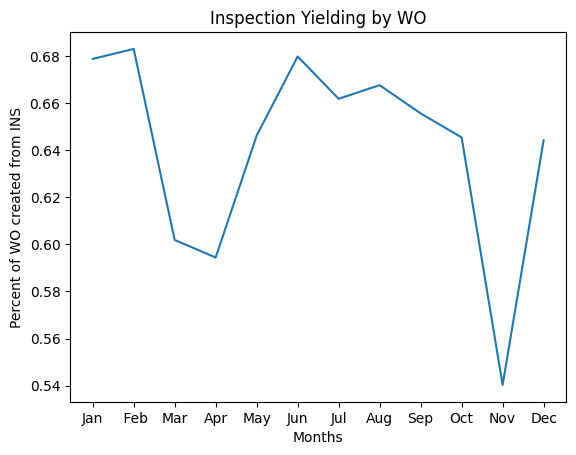

In [61]:
# plot percent of WO created from INS line chart
x = df_INS_yield_WO['month']
y1 = df_INS_yield_WO['percent']

# create a figure and axis object
fig, ax1 = plt.subplots()

# plot the first line on the first y-axis
ax1.plot(x, y1, label='Percent of WO created from INS')
ax1.set_ylabel('Percent of WO created from INS')
ax1.set_xlabel('Months')

# show the plot
plt.title('Inspection Yielding by WO')
plt.show()


## Work Orders Completed Weekly

In [66]:
# turnn WOClosedDate into datetime
mergeddf['WOClosedDate'] = pd.to_datetime(mergeddf['WOClosedDate'],errors='coerce')
mergeddf["WOClosedDate_week_number"] = mergeddf["WOClosedDate"].dt.week
mergeddf.groupby(['WOClosedDate_week_number']).size()

/var/folders/3f/0w5y80cn6wj986lwfb84fv540000gn/T/ipykernel_27134/282788310.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  mergeddf["WOClosedDate_week_number"] = mergeddf["WOClosedDate"].dt.week


WOClosedDate_week_number
1.0     464
2.0     470
3.0     429
4.0     387
5.0     276
6.0     231
7.0     126
8.0     227
9.0     137
10.0    381
11.0    194
12.0    213
13.0    114
14.0    206
15.0    151
16.0    266
17.0    149
18.0    167
19.0    220
20.0    339
21.0    321
22.0    253
23.0    329
24.0    270
25.0    459
26.0    401
27.0    267
28.0    413
29.0    342
30.0    535
31.0    450
32.0    372
33.0    295
34.0    448
35.0    439
36.0    432
37.0    640
38.0    408
39.0    392
40.0    638
41.0    330
42.0    475
43.0    440
44.0    372
45.0     99
46.0    365
47.0    280
48.0    608
49.0    456
50.0    530
51.0    572
52.0    486
dtype: int64

In [67]:
priority_encoding_map = {12: 'A', 11: 'A', 10: 'B', 8: 'C', 9: 'C'}
for i in range(3, 9):
    risk_encoding_map[i] = 'D'
for i in range(0, 3):
    risk_encoding_map[i] = 'E'


# Apply the function to each row of the DataFrame
mergeddf['WOPriority'].fillna(0, inplace=True)
mergeddf['Priority_coded'] = mergeddf['WOPriority'].apply(map_priority)

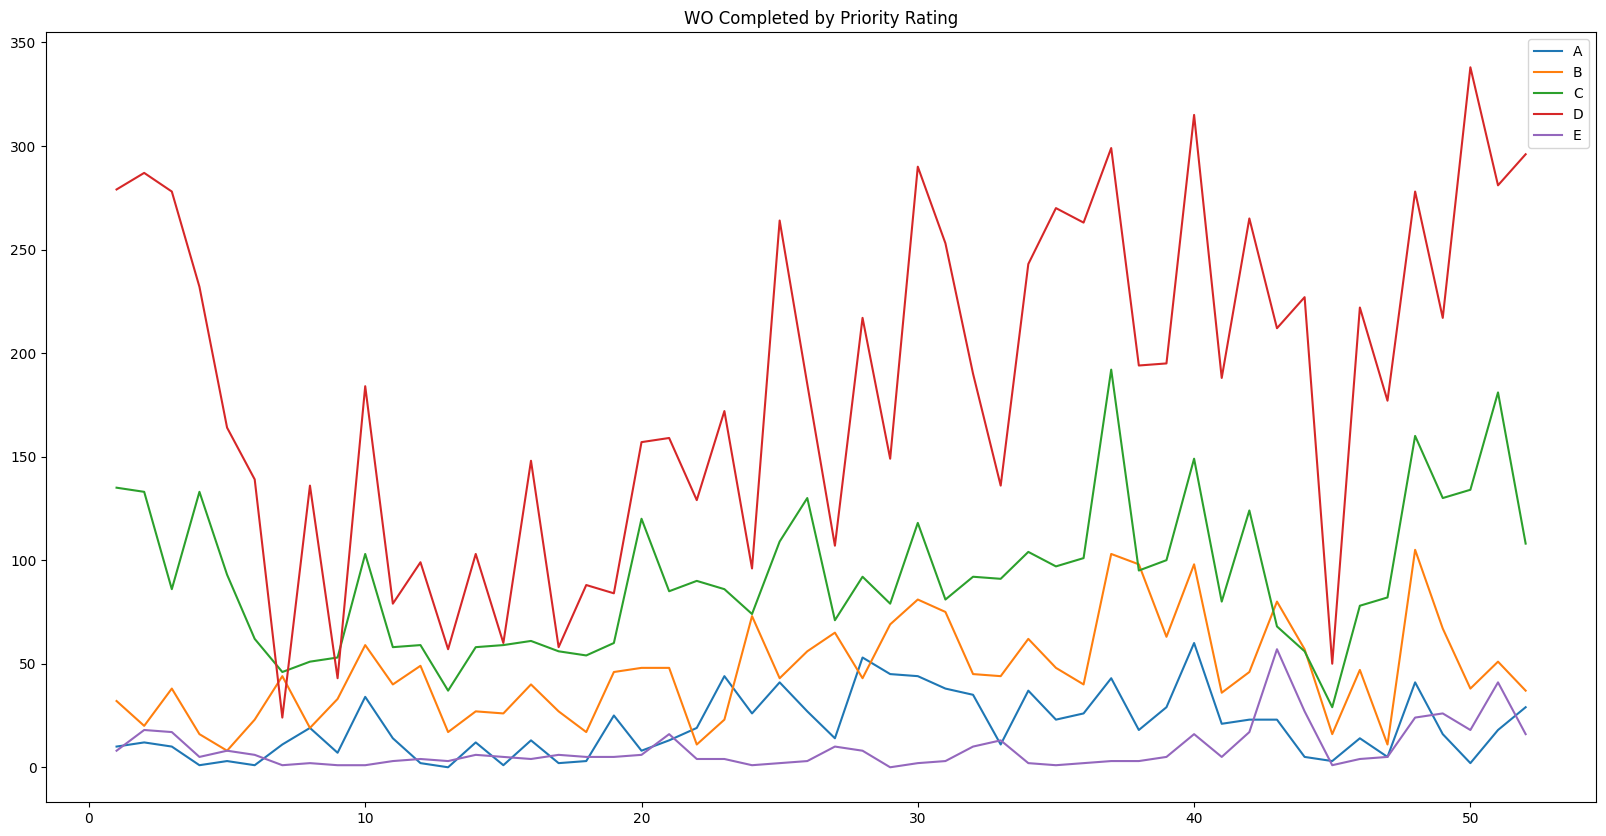

In [69]:
# plot the data hue by Priority_coded 
wo_completed_weekly = mergeddf[['WOClosedDate_week_number','WOPriority','Priority_coded']]
wo_completed_weekly = wo_completed_weekly.groupby(['WOClosedDate_week_number', 'Priority_coded']).size().unstack()
wo_completed_weekly.reset_index(inplace=True)
wo_completed_weekly.fillna(0, inplace=True)
ax = plt.subplot()
# change fig size to 20, 10
fig = plt.gcf()
fig.set_size_inches(20, 10)

ax.plot(wo_completed_weekly["WOClosedDate_week_number"], wo_completed_weekly["A"])
ax.plot(wo_completed_weekly["WOClosedDate_week_number"], wo_completed_weekly["B"])
ax.plot(wo_completed_weekly["WOClosedDate_week_number"], wo_completed_weekly["C"])
ax.plot(wo_completed_weekly["WOClosedDate_week_number"], wo_completed_weekly["D"])
ax.plot(wo_completed_weekly["WOClosedDate_week_number"], wo_completed_weekly["E"])

plt.legend(['A',  'B', 'C','D','E' ])
plt.title('WO Completed by Priority Rating')
plt.show()

## Pending WOs by Type

In [78]:
df = mergeddf[mergeddf['WOStatus'] == 'Pending']

In [79]:
df

,SRCategory,SRType,SRPriority,SRSource,SRStatus,SRResolution,BoroughCode,CommunityBoard,ServiceRequestParentGlobalID,GlobalID,...,FailureImpact,WorkOrderGlobalID,SRCreatedDate_datetime,SRCreated_month,WOCreatedDate_month,Year,InsCreatedDate_month,Risk_coded,WOClosedDate_week_number,Priority_coded
3,Hazard,Hanging Limb Other,Routine,3-1-1 Call Center,Open,Work Priority Category - C,Queens,407.0,799570A8-71A4-4361-A6A8-464FA8AD9448,591583A7-B107-49EC-BFA7-415BE6D3EA4B,...,5.0,53D63DEA-0EFE-4DB7-89CB-EE8C5CBDD728,2022-07-07 15:30:49,7,6.0,2022,6.0,D,NaN,D
4,Hazard,Hanging Limb Other,Routine,3-1-1 Call Center,Open,Work Priority Category - C,Queens,407.0,799570A8-71A4-4361-A6A8-464FA8AD9448,591583A7-B107-49EC-BFA7-415BE6D3EA4B,...,6.0,53D63DEA-0EFE-4DB7-89CB-EE8C5CBDD728,2022-07-07 15:30:49,7,6.0,2022,6.0,D,NaN,D
403,Illegal Tree Damage,Trunk Damaged,Routine,3-1-1 Call Center,Open,Inspected - No Work Order,Queens,409.0,NaN,A2943CC7-9573-4CBC-AFF0-B6DC7913FB4E,...,NaN,NaN,2022-01-05 20:07:00,1,8.0,2022,8.0,E,NaN,E
1188,Plant Tree,Street Tree,Routine,Department of Parks and Recreation - Public We...,Closed,Inspected - Tentatively Approved for Planting,Brooklyn,303.0,NaN,21C11B01-7CCD-4A38-869B-2C9BA1D93DE0,...,NaN,NaN,2022-01-15 07:25:00,1,9.0,2022,9.0,E,NaN,E
1189,Plant Tree,Street Tree,Routine,Department of Parks and Recreation - Public We...,Closed,Inspected - Tentatively Approved for Planting,Brooklyn,303.0,NaN,B7E74DF6-0038-485B-9628-68643149CE3D,...,NaN,NaN,2022-01-15 07:26:00,1,9.0,2022,9.0,E,NaN,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105752,Pest/Disease,Disease - Unidentified,Routine,Correspondence,Open,Work Priority Category - C,Staten Island,503.0,NaN,272C5273-730A-4376-BC0D-F2D3981785A5,...,4.0,6D2CD986-9B35-4BB0-BA7F-A2D8EFABEA6F,2022-06-24 17:52:00,6,7.0,2022,7.0,D,NaN,D
105924,Prune,Prune Other,Routine,AMPS,Closed,Inspected - Utility Wk Reqd,Brooklyn,310.0,NaN,DE08EFB1-5DF9-497A-ACB6-8ED94FA0B7DD,...,5.0,CE315643-6517-47B0-906B-39EBCB941AEB,2022-06-18 15:33:00,6,6.0,2022,6.0,D,NaN,D
106252,Prune,Prune Dead Wood,Routine,Park Inspection Program,Open,Inspected - Utility Wk Reqd,Queens,411.0,NaN,1259D6CF-45AA-4CBA-96C0-8A0981BD0935,...,5.0,0670D3D8-03F2-4D08-AADB-0F94B3EB9941,2022-06-08 18:05:00,6,6.0,2022,6.0,C,NaN,C
106287,Remove Tree,Dead Tree Older Than 2 Years,Routine,Correspondence,Open,Work Priority Category - C,Staten Island,503.0,NaN,C366E8A9-A5F1-4B5C-946B-A34B6670A2C6,...,4.0,F7425418-F4C6-4AB5-A743-48877BF7153C,2022-06-07 13:30:00,6,6.0,2022,6.0,D,NaN,D


In [80]:
# encode TOType column with label encoder
df['WOType'].replace('Canopy Reduction', 'Other', inplace=True)
df['WOType'].replace('Limb Down', 'Other', inplace=True)
df['WOType'].replace('Misc Work', 'Other', inplace=True)
df['WOType'].replace('Pest & Disease Treatment', 'Other', inplace=True)

df['WOType'].replace('Rescue/Preservation - Space', 'Other', inplace=True)
df['WOType'].replace('Stump Removal', 'Other', inplace=True)
df['WOType'].replace('Stump Removal for Tree Planting', 'Other', inplace=True)

df['WOType'].replace('Tree Plant-Street Tree', 'Tree Plant', inplace=True)
df['WOType'].replace('Tree Plant-Street Tree Block', 'Tree Plant', inplace=True)

df['WOType'].replace('Tree Removal for Tree Planting', 'Tree Removal', inplace=True)

/var/folders/3f/0w5y80cn6wj986lwfb84fv540000gn/T/ipykernel_27134/3792168824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WOType'].replace('Canopy Reduction', 'Other', inplace=True)
/var/folders/3f/0w5y80cn6wj986lwfb84fv540000gn/T/ipykernel_27134/3792168824.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WOType'].replace('Limb Down', 'Other', inplace=True)
/var/folders/3f/0w5y80cn6wj986lwfb84fv540000gn/T/ipykernel_27134/3792168824.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [81]:
df.groupby(['WOCreatedDate_month', 'WOType']).size()

# convert to dataframe
df = pd.DataFrame(df.groupby(['WOCreatedDate_month', 'WOType']).size().unstack())
df['month'] = ['Jan' ,' Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df.fillna(0, inplace=True)

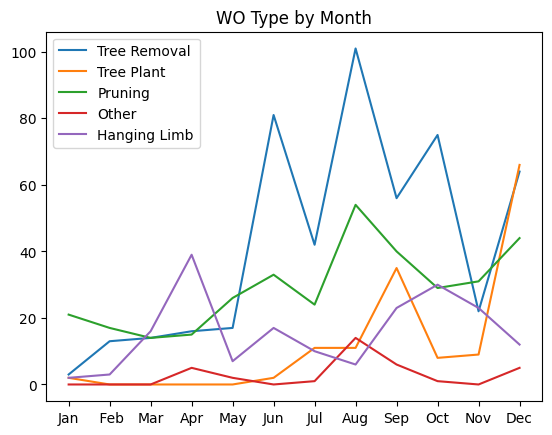

In [82]:
# plot the data of WOType by month
ax = plt.subplot()
# change fig size to 20, 10
# fig = plt.gcf()
# fig.set_size_inches(, 10)

ax.plot(df['month'], df["Tree Removal"])
ax.plot(df['month'], df["Tree Plant"])
ax.plot(df['month'], df["Pruning"])
ax.plot(df['month'], df["Other"])
ax.plot(df['month'], df["Hanging Limb"])

plt.legend(['Tree Removal', 'Tree Plant','Pruning', 'Other', 'Hanging Limb'])
plt.title('WO Type by Month')
plt.show()


replace na w/ 0